In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
image_path = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\images'

caption=r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\captions.txt'


In [4]:
df =pd.read_table(caption, header=None, names=['image_name', 'caption'])


print(df.head())


   image_name                                            caption
0  ROCO_00002   Computed tomography scan in axial view showin...
1  ROCO_00003   Bacterial contamination occurred after comple...
2  ROCO_00004   The patient had residual paralysis of the han...
3  ROCO_00005      Panoramic radiograph after immediate loading.
4  ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...


In [5]:
df.describe()

image_name                         caption
count        65450                           65450
unique       65450                           64772
top     ROCO_00002   Initial panoramic radiograph.
freq             1                              19

In [6]:
df['caption_length']=df['caption'].str.len()

In [7]:
df.head()

image_name                                            caption  \
0  ROCO_00002   Computed tomography scan in axial view showin...   
1  ROCO_00003   Bacterial contamination occurred after comple...   
2  ROCO_00004   The patient had residual paralysis of the han...   
3  ROCO_00005      Panoramic radiograph after immediate loading.   
4  ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...   

   caption_length  
0              88  
1             142  
2             320  
3              46  
4             124

In [8]:
print(df['caption_length'].describe())

count    65450.000000
mean       138.963453
std        104.237943
min          3.000000
25%         73.000000
50%        114.000000
75%        175.000000
max       2855.000000
Name: caption_length, dtype: float64


In [9]:
dlink_url = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\dlinks.txt'
dlink = pd.read_table(dlink_url, header=None, names=['image_id', 'dlink', 'image'])
print(dlink)

         image_id                                              dlink  \
0      ROCO_00002  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
1      ROCO_00003  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
2      ROCO_00004  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
3      ROCO_00005  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
4      ROCO_00007  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
...           ...                                                ...   
65445  ROCO_81819  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65446  ROCO_81820  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65447  ROCO_81821  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65448  ROCO_81822  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65449  ROCO_81823  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   

                                    image  
0                     AMHSR-4-14-g002.jpg  
1                  IJD2009-150251.001.jpg  
2  

In [10]:
dlink.describe()

image_id                                              dlink    image
count        65450                                              65450    65450
unique       65450                                              37396    60990
top     ROCO_00002  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...  gr1.jpg
freq             1                                                 37     1444

In [11]:
# Define paths for each split (train, test, validation) and categories (radiology, non-radiology)
base_dir = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data'

# Define the splits and categories
splits = ['train', 'test', 'validation']
categories = ['radiology', 'non-radiology']

# Initialize an empty list to store the data
data = []

# Loop through each split and category to read captions
for split in splits:
    for category in categories:
        # Define paths for images and captions.txt
        category_dir = os.path.join(base_dir, split, category)
        captions_file = os.path.join(category_dir, 'captions.txt')
        
        # Read the captions file if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the captions file
                for line in file:
                    image_id = line[:12]    # Assuming the first 12 characters are the image ID
                    caption = line[12:].strip()  # The rest of the line is the caption text
                    label = category  # Set label as 'radiology' or 'non-radiology'
                    
                    # Append to data list with image ID, caption, label, and split type
                    data.append([image_id, caption, label, split])

# Create a DataFrame with the collected data
df = pd.DataFrame(data, columns=['image_id', 'caption', 'Label', 'split'])

# Display the first few rows of the DataFrame to verify
df


image_id                                            caption  \
0      ROCO_00002\t   Computed tomography scan in axial view showing...   
1      ROCO_00003\t   Bacterial contamination occurred after complet...   
2      ROCO_00004\t   The patient had residual paralysis of the hand...   
3      ROCO_00005\t       Panoramic radiograph after immediate loading.   
4      ROCO_00007\t   Plain abdomen x-ray: Multiple air levels at th...   
...              ...                                                ...   
79743  ROCO_87894\t   Scanning electron photomicrograph of blood cel...   
79744  ROCO_87904\t   SEM of Solenopsis elhawagryi sp. n. minor work...   
79745  ROCO_87918\t   Under visualization through the anterolateral ...   
79746  ROCO_87936\t   The endoscopic view demonstrated progressive d...   
79747  ROCO_87952\t   A 7 Fr Kimny guiding catheter (Boston Scientif...   

               Label       split  
0          radiology       train  
1          radiology       train  
2          radiology       train  
3          radiology       train  
4          radiology       train  
...              ...         ...  
79743  non-radiology  validation  
79744  non-radiology  validation  
79745  non-radiology  validation  
79746  non-radiology  validation  
79747  non-radiology  validation  

[79748 rows x 4 columns]

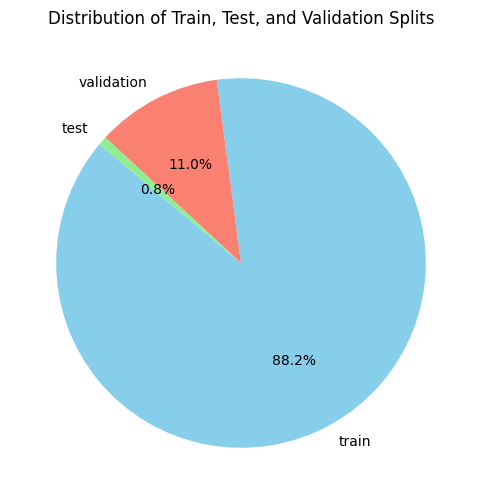

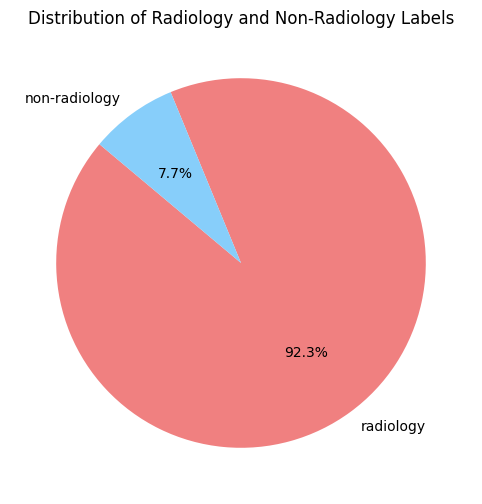

In [12]:
import matplotlib.pyplot as plt

# Pie chart for train/test/validation distribution
split_counts = df['split'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Train, Test, and Validation Splits")
plt.show()

# Pie chart for radiology and non-radiology distribution
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title("Distribution of Radiology and Non-Radiology Labels")
plt.show()


## ANALYSIS OF DATA

In [13]:
df['caption_length'] = df['caption'].str.len()

<Axes: xlabel='caption_length', ylabel='Count'>

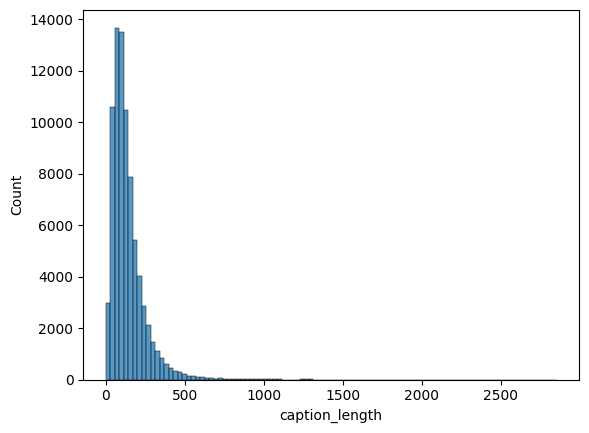

In [14]:
sns.histplot(df['caption_length'],bins=100)

In [15]:
from wordcloud import WordCloud

In [16]:
all_captions = ' '.join(df['caption'])

In [17]:
wordcloud = WordCloud(width=800, height=400, max_words=20).generate(all_captions)

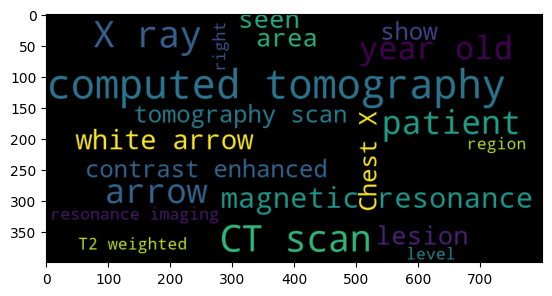

In [18]:
plt.imshow(wordcloud)

In [19]:
from collections import Counter
import re

In [20]:
words = re.findall(r'\w+', all_captions.lower())
# frequency of each word
word_counts = Counter(words)
# Display the most common words
print(word_counts.most_common(5))

[('the', 120433), ('of', 77601), ('and', 36235), ('a', 33406), ('in', 31768)]


In [21]:
top_words=word_counts.most_common(10)

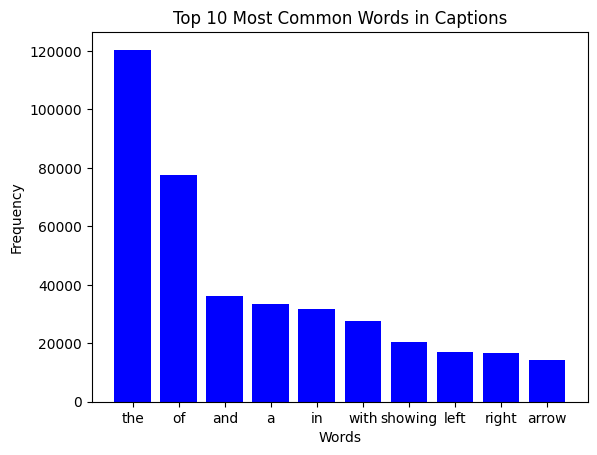

In [22]:
words, counts = zip(*top_words)
plt.bar(words, counts, color='blue')
plt.title("Top 10 Most Common Words in Captions")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

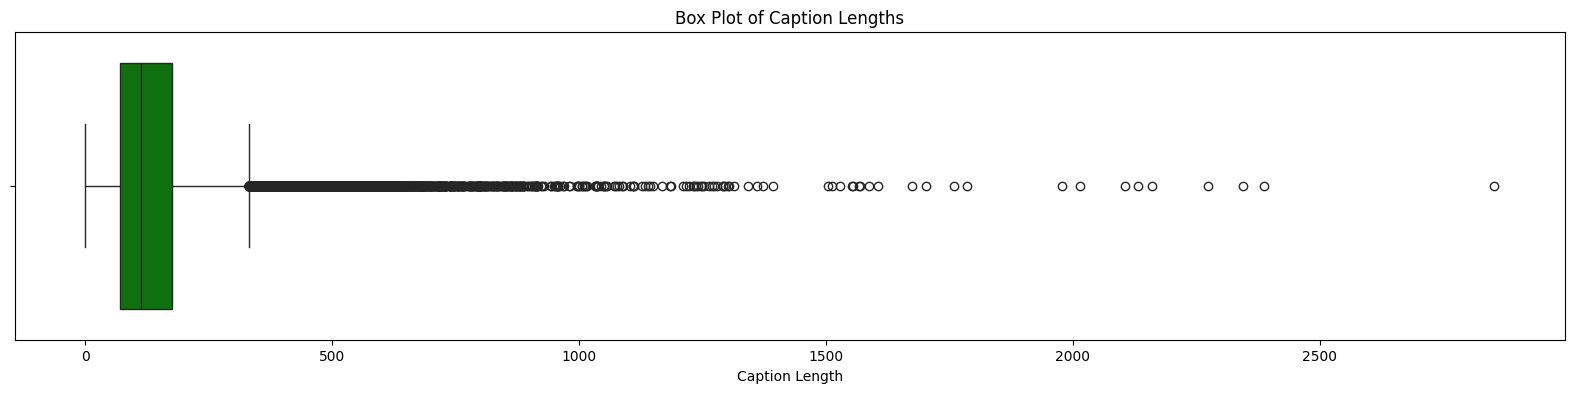

In [23]:
plt.figure(figsize=(20, 4))
sns.boxplot(x=df['caption_length'], color='green')
plt.title('Box Plot of Caption Lengths')
plt.xlabel('Caption Length')
plt.show()


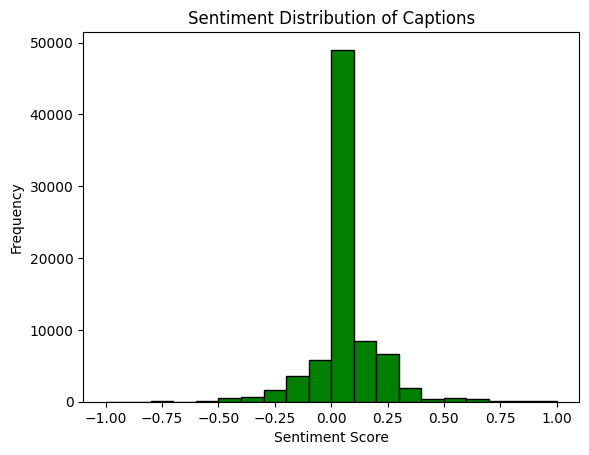

In [24]:
from textblob import TextBlob
sentiment_scores = df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(sentiment_scores, bins=20, color='green', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Captions")
plt.show()

### IMAGE PREPROCESSING

In [25]:
import cv2

In [26]:
image_files=[f for f in os.listdir(image_path) if f.endswith(".jpg")]

In [27]:
img_path=os.path.join(image_path,image_files[27])

In [28]:
img_path

'C:\\Users\\KIIT\\Documents\\roco_dataset_extracted\\all_data\\train\\radiology\\images\\PMC1097744_1476-7120-3-11-1.jpg'

In [29]:
img=cv2.imread(img_path)
img

array([[[102, 106,  40],
        [ 84,  88,  22],
        [ 95,  99,  33],
        ...,
        [100, 100,  36],
        [ 89,  91,  32],
        [ 85, 104,  17]],

       [[ 86,  90,  24],
        [ 61,  65,   0],
        [ 65,  69,   3],
        ...,
        [ 59,  68,   5],
        [ 62,  64,  12],
        [ 45,  34,   0]],

       [[ 95,  99,  33],
        [ 63,  67,   1],
        [ 64,  68,   2],
        ...,
        [ 98, 111,  79],
        [ 64,  74,  14],
        [ 52,  36,   0]],

       ...,

       [[ 93,  97,  31],
        [ 61,  65,   0],
        [ 63,  67,   1],
        ...,
        [ 62,  67,   0],
        [ 59,  65,   0],
        [ 40,  35,   4]],

       [[ 93,  97,  31],
        [ 61,  65,   0],
        [ 63,  67,   1],
        ...,
        [ 62,  67,   0],
        [ 59,  65,   0],
        [ 40,  35,   4]],

       [[ 44,  38,   1],
        [ 43,  37,   0],
        [ 41,  35,   0],
        ...,
        [ 43,  36,   3],
        [ 42,  35,   2],
        [ 39,  34,   1]]

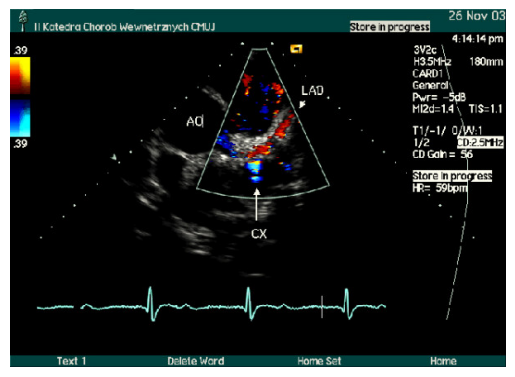

In [30]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off') 
plt.show()

In [31]:
image_rgb.shape

(433, 600, 3)

In [32]:
target_size=(224,224)
resizedimg=cv2.resize(image_rgb,target_size)

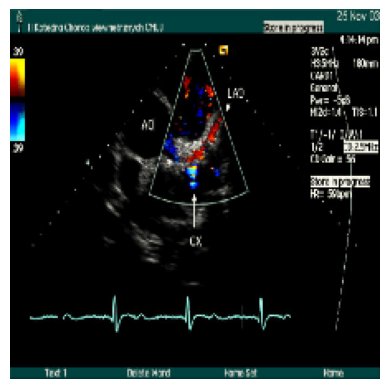

In [33]:
plt.imshow(resizedimg)
plt.axis('off')
plt.show()

In [34]:
img_processed=image_rgb

In [35]:
img_normalized=img_processed/255

In [36]:
import tensorflow as tf

In [37]:
img=np.expand_dims(img,axis=0)

In [38]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=0.2
                                        )
it=datagen.flow(img,batch_size=1)
augmented_images=[next(it)[0] for _ in range(5)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


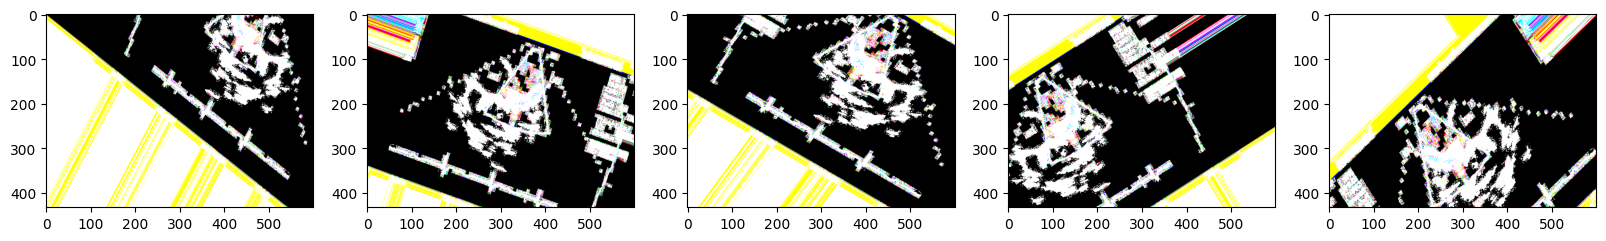

In [39]:

plt.figure(figsize=(20,5))
for i,aug_img in enumerate(augmented_images):
  plt.subplot(1,5,i+1)
  plt.imshow(aug_img)

### VGG16 FEATURE MAP EXTRACTION

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [41]:
  base_model=VGG16(weights="imagenet")

In [42]:
from tensorflow.keras.preprocessing import image

In [43]:
model=Model(inputs=base_model.input,outputs=base_model.get_layer("block5_conv3").output) 

In [44]:
def load_and_preprocess_image(img_path,target_size=(224,224)):
  img=image.load_img(img_path,target_size=target_size)
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=preprocess_input(img_array)
  return img_array

In [45]:
img=image.load_img(r"C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images/PMC1459185_1748-717X-1-7-8.jpg",target_size=(224,224))
img_array=image.img_to_array(img)

In [46]:
img_array.shape

(224, 224, 3)

In [47]:
img_array=np.expand_dims(img_array,axis=0)
img_array.shape

(1, 224, 224, 3)

In [48]:
feature_map=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [49]:
n_features=feature_map.shape[-1]

In [50]:
n_features

512

In [51]:
size=feature_map.shape[1]

In [52]:
from PIL import Image

In [53]:
img=Image.open(img_path)

In [54]:
img.size

(600, 433)

In [55]:
display_grid=np.zeros((size,size*n_features))

In [56]:
display_grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
for i in range(n_features):
  x=feature_map[0,:,:,i]
  x-=x.mean()
  x/=(x.std()+1e-5)
  x*=64
  x+=128
  x=np.clip(x,0,255).astype(int)
  display_grid[:,i*size:(i+1)*size]=x

In [58]:
scale=20./n_features

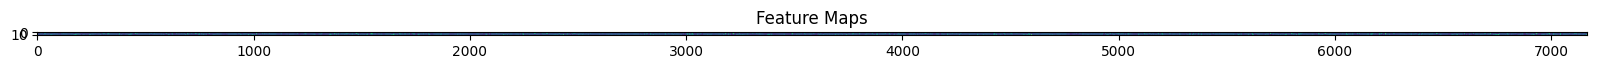

In [59]:
plt.figure(figsize=(scale*n_features,scale))
plt.title("Feature Maps")
plt.grid(False)
plt.imshow(display_grid,aspect="auto")

### Final Image captioning

In [101]:
image_paths_file = "C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/images"
captions_file = "C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/captions"

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Add
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd

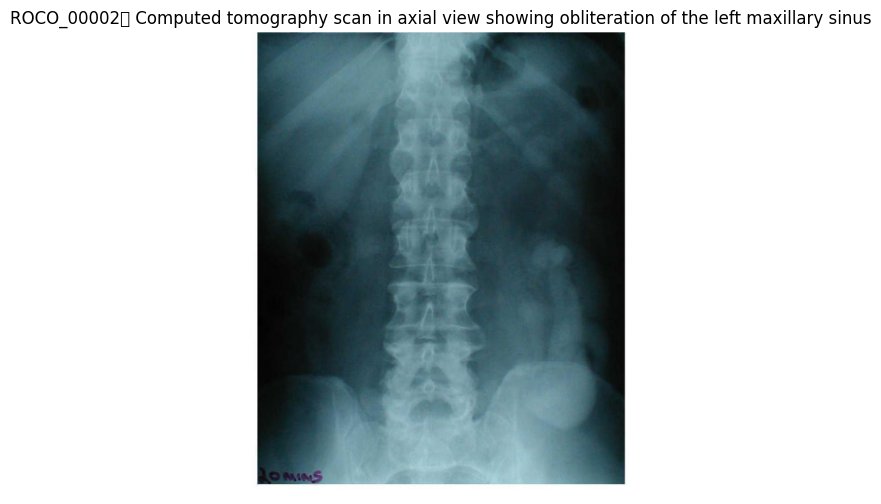

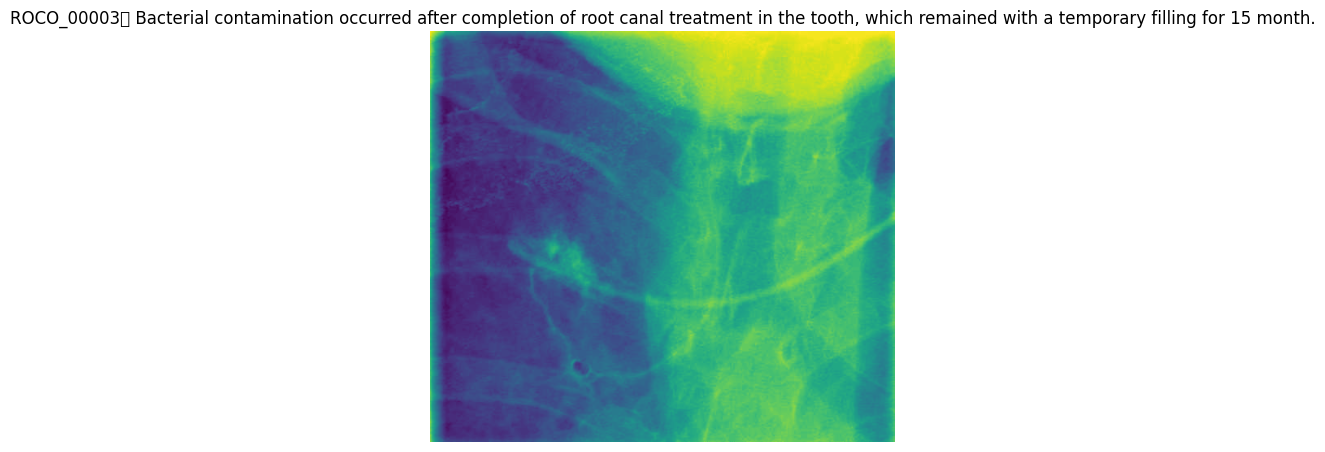

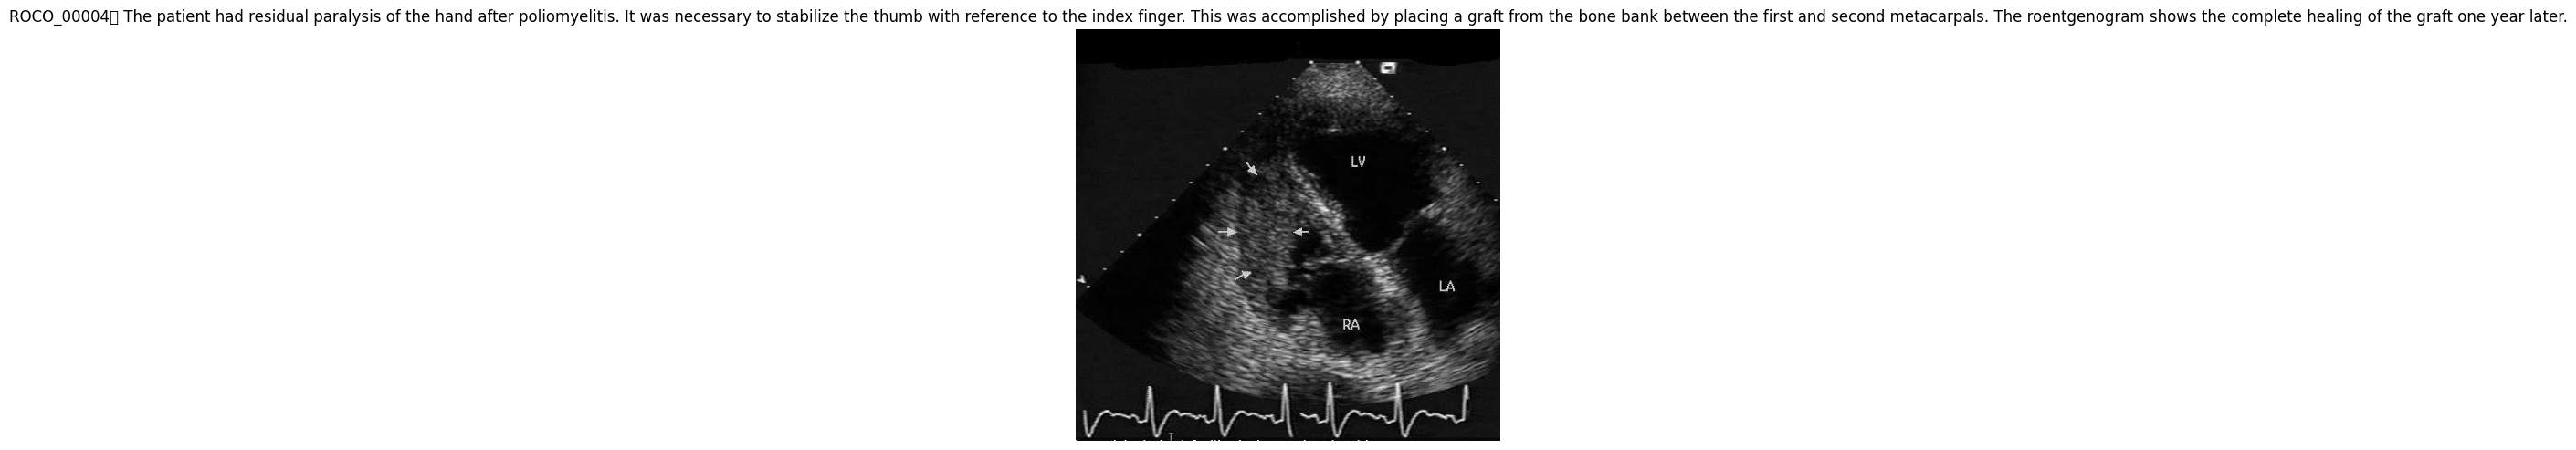

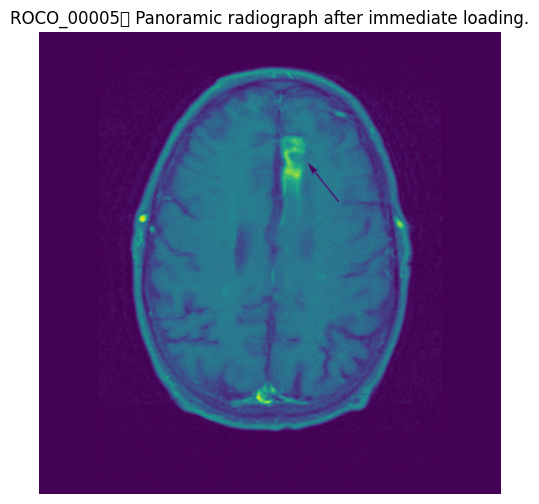

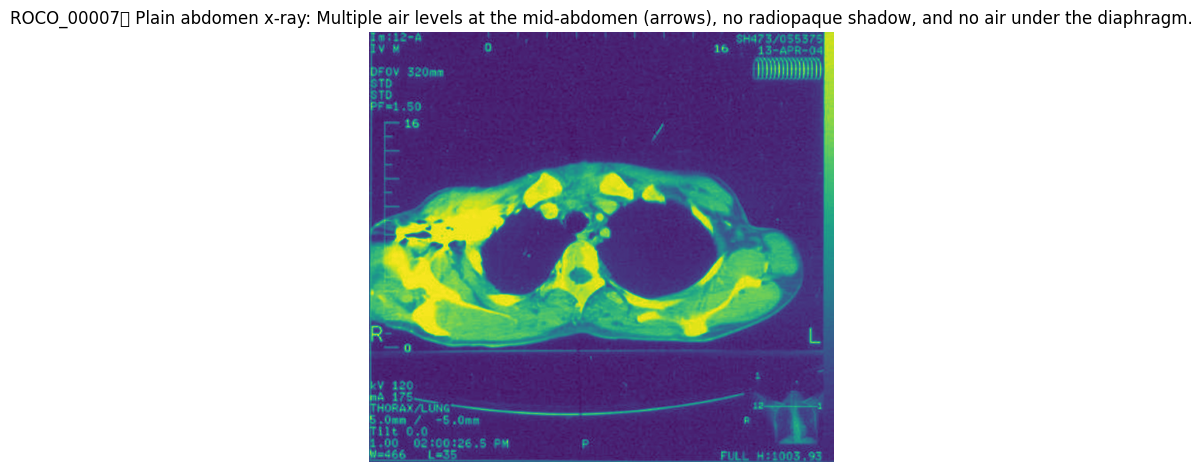

In [103]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os  # Import the os module

image_dir = "C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/images" # Path to the image directory
captions_file = "C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt"

# Get a list of image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

# Open the captions file with the correct encoding
with open(captions_file, 'r', encoding='utf-8') as f:
    captions = [line.strip() for line in f]

# Ensure both lists have the same length before zipping
min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]

# Display images with captions
for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
    if i >= 5:
        break
    img = mpimg.imread(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption, fontsize=12)
    plt.show()


In [104]:
image_captions = {}
for img, cap in zip(image_paths, captions):
    if img not in image_captions:
        image_captions[img] = []
    image_captions[img].append(cap)

# The dictionary is now populated, but nothing is printed.


In [105]:
# Flatten all captions from the dictionary
all_captions = [caption for captions in image_captions.values() for caption in captions]
all_captions[:5]

['ROCO_00002\t Computed tomography scan in axial view showing obliteration of the left maxillary sinus',
 'ROCO_00003\t Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month.',
 'ROCO_00004\t The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows the complete healing of the graft one year later.',
 'ROCO_00005\t Panoramic radiograph after immediate loading.',
 'ROCO_00007\t Plain abdomen x-ray: Multiple air levels at the mid-abdomen (arrows), no radiopaque shadow, and no air under the diaphragm.']

In [106]:
# Flatten all captions from the dictionary
all_captions = [caption for captions in image_captions.values() for caption in captions]

print("All Captions:")
for i, caption in enumerate(all_captions, 1):
    print(f"{i}. {caption}")

All Captions:
1. ROCO_00002	 Computed tomography scan in axial view showing obliteration of the left maxillary sinus
2. ROCO_00003	 Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month.
3. ROCO_00004	 The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows the complete healing of the graft one year later.
4. ROCO_00005	 Panoramic radiograph after immediate loading.
5. ROCO_00007	 Plain abdomen x-ray: Multiple air levels at the mid-abdomen (arrows), no radiopaque shadow, and no air under the diaphragm.
6. ROCO_00008	 A 3-year-old child with visual difficulties. Axial FLAIR image show a supra-sellar lesion extending to the temporal lobes along the optic tracts (arrows) with moderate mass eff

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer

def preprocess_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    max_length = max(len(seq) for seq in sequences)
    vocab_size = len(tokenizer.word_index) + 1
    return tokenizer, sequences, max_length, vocab_size

# Preprocess the captions
tokenizer, sequences, max_length, vocab_size = preprocess_captions(all_captions)

# Print results
print("Preprocessing Results:")
print(f"Vocabulary Size: {vocab_size}")
print(f"Maximum Sequence Length: {max_length}")
print("Sample Sequences (first 5):")
for i, seq in enumerate(sequences[:5], 1):  # Display the first 5 sequences
    print(f"{i}. {seq}")

print("Word Index (first 10 words):")
for word, index in list(tokenizer.word_index.items())[:10]:  # Display the first 10 words in the vocabulary
    print(f"{word}: {index}")


Preprocessing Results:
Vocabulary Size: 21064
Maximum Sequence Length: 207
Sample Sequences (first 5):
1. [2, 6413, 23, 19, 15, 6, 26, 25, 8, 1301, 3, 1, 9, 259, 123]
2. [2, 6414, 4584, 6415, 2231, 27, 1656, 3, 351, 271, 198, 6, 1, 507, 111, 2051, 7, 5, 4585, 269, 84, 600, 294]
3. [2, 6416, 1, 34, 317, 424, 4586, 3, 1, 742, 27, 6417, 229, 28, 4587, 13, 4588, 1, 1657, 7, 957, 13, 1, 958, 1467, 74, 28, 6418, 46, 3711, 5, 345, 37, 1, 66, 6419, 99, 1, 220, 4, 278, 2724, 1, 1658, 17, 1, 184, 1098, 3, 1, 345, 249, 40, 558]
4. [2, 6420, 149, 24, 27, 929, 2725]
5. [2, 6421, 182, 59, 30, 32, 87, 140, 780, 18, 1, 332, 59, 38, 62, 984, 615, 4, 62, 140, 758, 1, 679]
Word Index (first 10 words):
the: 1
roco: 2
of: 3
and: 4
a: 5
in: 6
with: 7
showing: 8
left: 9
right: 10


In [108]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import random

# Define the feature extraction function
def extract_features(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img, verbose=0)  # Set verbose=0 to suppress model output
    return features

# Load the pre-trained InceptionV3 model
image_model = InceptionV3(weights="imagenet")
image_model = Model(inputs=image_model.input, outputs=image_model.layers[-2].output)

# Randomly select 10 image paths
random_image_paths = random.sample(image_paths, 10)

# Extract features for the selected random images
image_features = {}
for image_path in random_image_paths:
    features = extract_features(image_path, image_model)
    image_features[image_path] = features

    # Print only the first 10 feature values
    print(f"Image: {image_path}")
    print(f"Features Shape: {features.shape}")
    print(f"Features (first 10 values): {features[0][:10]}")  # Print only first 10 values
    print("-" * 40)


Image: C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/images\PMC4732548_amjcaserep-17-43-g003.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.17397015 0.2575317  0.21490055 0.26804876 0.18940404 0.6548359
 0.19543545 0.46215189 0.06566994 0.34100842]
----------------------------------------
Image: C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/images\PMC3716898_1532-429X-15-54-12.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.45055103 0.28024006 0.04782416 0.24779724 0.19832939 0.85033196
 0.37731498 0.03392729 0.0179512  0.32682484]
----------------------------------------
Image: C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/test/radiology/images\PMC3758518_DFA-4-21819-g012.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.02198038 1.119744   0.38339376 0.09084805 0.3278938  0.5002346
 0.67125183 0.23302898 0.2467773  0.03823593]
----------------------------------------
Image: C:/Users/KIIT

In [109]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Add

# Function to create the model
def create_model(vocab_size, max_length):
    # Image Input
    image_input = Input(shape=(2048,), name="image_input")
    image_dense = Dense(256, activation="relu", name="image_dense")(image_input)

    # Text Input
    text_input = Input(shape=(max_length,), name="text_input")
    text_embedding = Embedding(vocab_size, 256, mask_zero=True)(text_input)
    text_lstm = LSTM(256, name="text_lstm")(text_embedding)

    # Decoder
    decoder = Add(name="add_layer")([image_dense, text_lstm])
    decoder_dense = Dense(256, activation="relu", name="decoder_dense")(decoder)
    output = Dense(vocab_size, activation="softmax", name="output")(decoder_dense)

    # Define the model
    model = Model(inputs=[image_input, text_input], outputs=output)

    # Print model summary
    model.summary()

    return model

# Create the model
model = create_model(vocab_size, max_length)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam")


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)       │ (None, 207)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ image_input (InputLayer)      │ (None, 2048)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2 (Embedding)       │ (None, 207, 256)          │       5,392,384 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal_2 (NotEqual)        │ (None, 207)               │               0 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ image_dense (Dense)           │ (None, 256)               │         524,544 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_lstm (LSTM)              │ (None, 256)               │         525,312 │ embedding_2[0][0],         │
│                               │                           │                 │ not_equal_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_layer (Add)               │ (None, 256)               │               0 │ image_dense[0][0],         │
│                               │                           │                 │ text_lstm[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ decoder_dense (Dense)         │ (None, 256)               │          65,792 │ add_layer[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 21064)             │       5,413,448 │ decoder_dense[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,921,480 (45.48 MB)

 Trainable params: 11,921,480 (45.48 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

def data_generator(image_features, caption_path, tokenizer, max_length, vocab_size):
    # Load captions from file with utf-8 encoding
    with open(caption_path, 'r', encoding='utf-8') as f:
        captions = [line.strip() for line in f]

    while True:
        for i, (image_id, image_feature) in enumerate(image_features.items()):
            caption = captions[i]  # Match caption by index
            seq = tokenizer.texts_to_sequences([caption])[0]
            for j in range(1, len(seq)):
                input_seq = seq[:j]
                output_word = seq[j]

                # Pad the input sequence
                input_seq_padded = pad_sequences([input_seq], maxlen=max_length, padding='post')[0]

                # Convert to tensors
                image_feature_tensor = tf.convert_to_tensor(image_feature[0], dtype=tf.float32)
                input_seq_tensor = tf.convert_to_tensor(input_seq_padded, dtype=tf.float32)
                output_word_tensor = tf.keras.utils.to_categorical([output_word], num_classes=vocab_size)[0]
                output_word_tensor = tf.convert_to_tensor(output_word_tensor, dtype=tf.float32)

                # Yield the result
                yield (image_feature_tensor, input_seq_tensor), output_word_tensor

# Test the generator with captions file
def test_generator_with_captions():
    # Dummy data for testing
    image_features = {
        "image_1": [tf.random.uniform((2048,))],
        "image_2": [tf.random.uniform((2048,))],
    }
    captions_file_path = r"C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\captions.txt"


    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    # Load captions from file for tokenizer fitting with utf-8 encoding
    with open(captions_file_path, 'r', encoding='utf-8') as f:
        all_captions = [line.strip() for line in f]
    tokenizer.fit_on_texts(all_captions)

    max_length = 10
    vocab_size = len(tokenizer.word_index) + 1

    gen = data_generator(image_features, captions_file_path, tokenizer, max_length, vocab_size)

    # Generate and print a few examples
    for _ in range(5):  # Generate 5 samples for demonstration
        (image_feature_tensor, input_seq_tensor), output_word_tensor = next(gen)
        print(f"Image Feature Tensor: {image_feature_tensor.numpy()[:10]}")  # Print first 10 values
        print(f"Input Sequence Tensor: {input_seq_tensor.numpy()}")
        print(f"Output Word Tensor: {output_word_tensor.numpy()}")
        print("-" * 40)

test_generator_with_captions()


Image Feature Tensor: [0.52365756 0.7197584  0.9796053  0.08124709 0.6928607  0.28028476
 0.7864016  0.44492686 0.03089559 0.319198  ]
Input Sequence Tensor: [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature Tensor: [0.52365756 0.7197584  0.9796053  0.08124709 0.6928607  0.28028476
 0.7864016  0.44492686 0.03089559 0.319198  ]
Input Sequence Tensor: [2.0000e+00 1.9785e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature Tensor: [0.52365756 0.7197584  0.9796053  0.08124709 0.6928607  0.28028476
 0.7864016  0.44492686 0.03089559 0.319198  ]
Input Sequence Tensor: [2.0000e+00 1.9785e+04 2.2000e+01 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature

Processing ResNet50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Block: conv1_conv
Top 5 feature indices (sorted by mean activation): [ 6 16 62 13 22]
Top 5 feature mean activations: [ 26.475573  43.166744  53.50893   84.024284 112.782135]


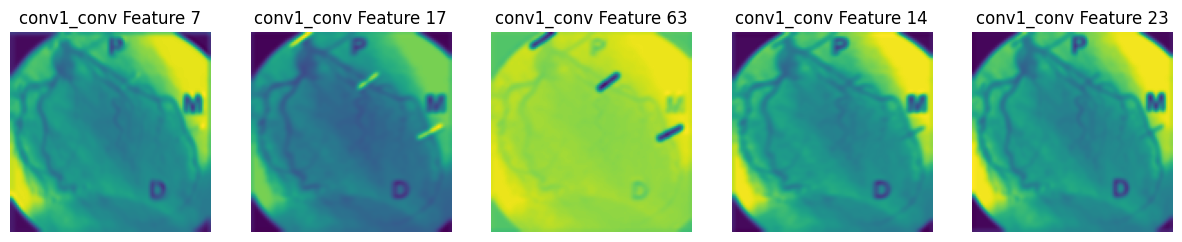

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Top 5 Predictions for resnet:
1. mailbag: 14.16%
2. baseball: 7.11%
3. stopwatch: 6.92%
4. bib: 6.23%
5. measuring_cup: 5.51%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Block: conv2_block1_out
Top 5 feature indices (sorted by mean activation): [144  36 132  73 173]
Top 5 feature mean activations: [2.436636  2.4521015 2.612215  2.6929374 2.9148903]


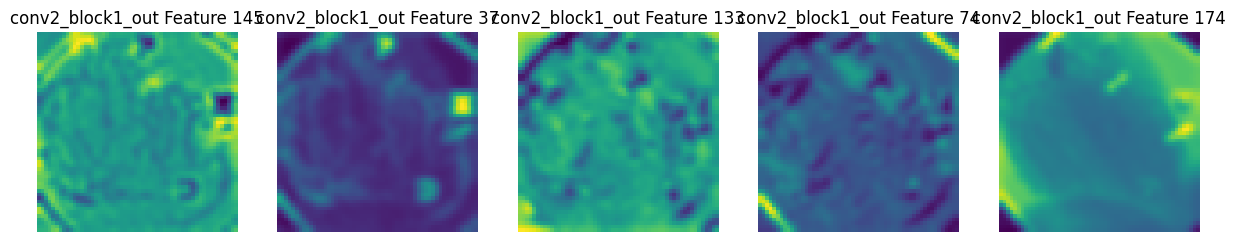

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Top 5 Predictions for resnet:
1. mailbag: 14.16%
2. baseball: 7.11%
3. stopwatch: 6.92%
4. bib: 6.23%
5. measuring_cup: 5.51%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Block: conv3_block1_out
Top 5 feature indices (sorted by mean activation): [385 511  18 305 118]
Top 5 feature mean activations: [2.2385776 2.2401323 2.4272132 2.820955  3.6039226]


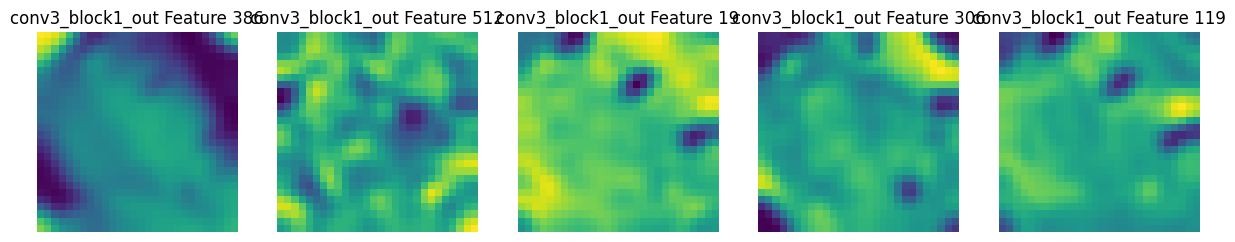

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

Top 5 Predictions for resnet:
1. mailbag: 14.16%
2. baseball: 7.11%
3. stopwatch: 6.92%
4. bib: 6.23%
5. measuring_cup: 5.51%
Processing VGG16...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Block: block1_conv2
Top 5 feature indices (sorted by mean activation): [47 25 52 27  4]
Top 5 feature mean activations: [182.49884 210.00978 243.27681 384.60742 400.6401 ]


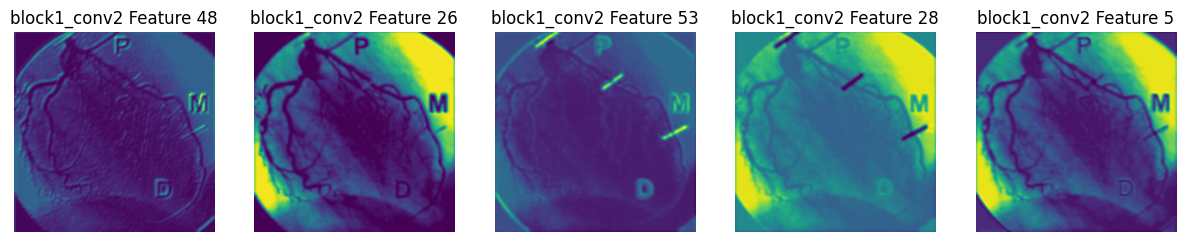

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step

Top 5 Predictions for vgg16:
1. analog_clock: 62.45%
2. wall_clock: 26.46%
3. puck: 2.67%
4. shield: 1.49%
5. pick: 1.38%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Block: block2_conv2
Top 5 feature indices (sorted by mean activation): [ 85  56  33 100 125]
Top 5 feature mean activations: [326.95053 327.3918  406.2393  413.84845 429.69794]


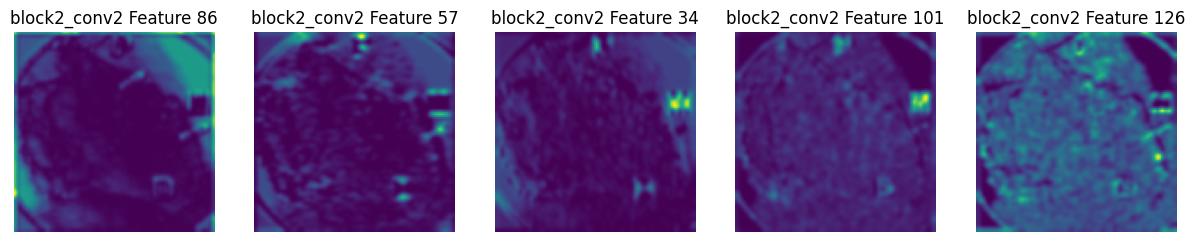

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

Top 5 Predictions for vgg16:
1. analog_clock: 62.45%
2. wall_clock: 26.46%
3. puck: 2.67%
4. shield: 1.49%
5. pick: 1.38%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Block: block3_conv3
Top 5 feature indices (sorted by mean activation): [ 55 133 202 221  54]
Top 5 feature mean activations: [314.1458  329.769   347.77148 377.96237 411.45145]


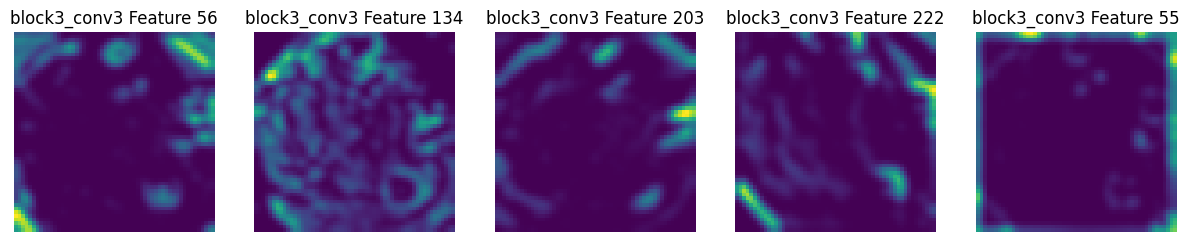

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step

Top 5 Predictions for vgg16:
1. analog_clock: 62.45%
2. wall_clock: 26.46%
3. puck: 2.67%
4. shield: 1.49%
5. pick: 1.38%
Processing VGG19...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Block: block1_conv2
Top 5 feature indices (sorted by mean activation): [39  2 42 54  4]
Top 5 feature mean activations: [269.44302 275.40726 278.60947 331.43027 388.88968]


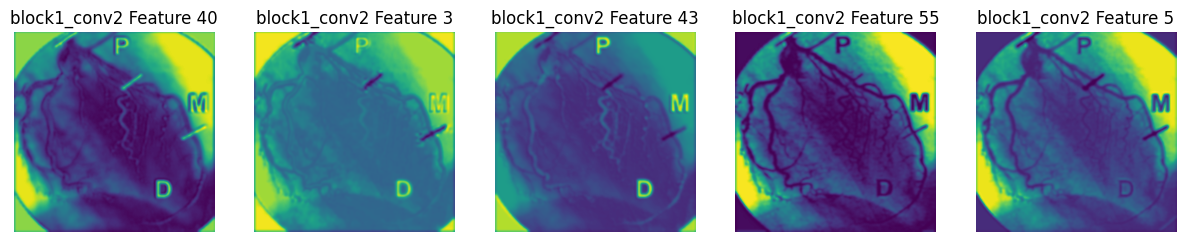

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step

Top 5 Predictions for vgg19:
1. analog_clock: 36.47%
2. bathing_cap: 13.43%
3. golf_ball: 9.86%
4. wall_clock: 9.33%
5. barometer: 3.32%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Block: block2_conv2
Top 5 feature indices (sorted by mean activation): [ 84 100  30  56 125]
Top 5 feature mean activations: [181.59656 197.59244 207.6421  214.85522 240.39468]


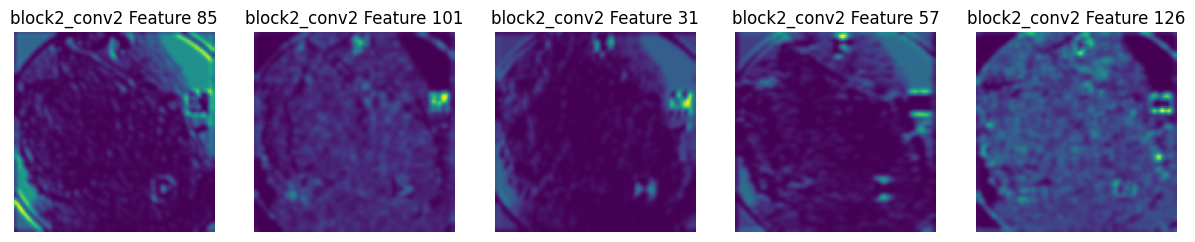

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step

Top 5 Predictions for vgg19:
1. analog_clock: 36.47%
2. bathing_cap: 13.43%
3. golf_ball: 9.86%
4. wall_clock: 9.33%
5. barometer: 3.32%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
Block: block3_conv4
Top 5 feature indices (sorted by mean activation): [ 21 249 214 250 194]
Top 5 feature mean activations: [830.6881  859.90826 863.9815  921.7781  949.3492 ]


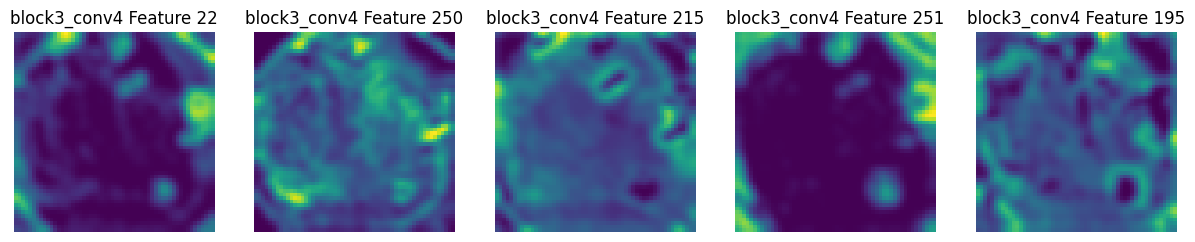

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step

Top 5 Predictions for vgg19:
1. analog_clock: 36.47%
2. bathing_cap: 13.43%
3. golf_ball: 9.86%
4. wall_clock: 9.33%
5. barometer: 3.32%


In [111]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import cv2

# Load and preprocess the image
def preprocess_image(image_path, model_type):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    if model_type == 'resnet':
        return resnet_preprocess(img_array)
    elif model_type == 'vgg16':
        return vgg16_preprocess(img_array)
    elif model_type == 'vgg19':
        return vgg19_preprocess(img_array)
    return img_array

# Extract features from specific blocks of the model
def extract_block_features(image_path, model, block_name, model_type):
    preprocessed_img = preprocess_image(image_path, model_type)
    intermediate_layer_model = tf.keras.Model(
        inputs=model.input, outputs=model.get_layer(block_name).output
    )
    feature_map = intermediate_layer_model.predict(preprocessed_img)
    return feature_map

# Visualize the top 5 feature maps for a block, print indices, mean activations, and their class names
def visualize_block_features(feature_map, block_name, num_features=5):
    # Normalize the feature map for visualization
    feature_map = feature_map.squeeze()
    feature_map_mean = np.mean(feature_map, axis=(0, 1))
    top_features_idx = np.argsort(feature_map_mean)[-num_features:]

    print(f"Block: {block_name}")
    print("Top 5 feature indices (sorted by mean activation):", top_features_idx)
    print("Top 5 feature mean activations:", feature_map_mean[top_features_idx])

    # Visualize feature maps
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(top_features_idx):
        plt.subplot(1, num_features, i + 1)
        plt.imshow(cv2.GaussianBlur(feature_map[:, :, idx], (5, 5), 0), cmap='viridis')  # Denoise with GaussianBlur
        plt.title(f'{block_name} Feature {idx + 1}')
        plt.axis('off')
    plt.show()

# Get top 5 predicted class names and their probabilities
def get_top_5_predictions(image_path, model, model_type):
    preprocessed_img = preprocess_image(image_path, model_type)
    preds = model.predict(preprocessed_img)
    decoded_preds = decode_predictions(preds, top=5)[0]

    print(f"\nTop 5 Predictions for {model_type}:")
    for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
        print(f"{i+1}. {label}: {prob * 100:.2f}%")

# Load pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=True)
vgg16_model = VGG16(weights='imagenet', include_top=True)
vgg19_model = VGG19(weights='imagenet', include_top=True)

# Image path
image_path =r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\images\PMC317358_1476-7120-1-16-2.jpg' # Replace with your image path

# Extract and visualize features for specific blocks
blocks = {
    'resnet': ['conv1_conv', 'conv2_block1_out', 'conv3_block1_out'],
    'vgg16': ['block1_conv2', 'block2_conv2', 'block3_conv3'],
    'vgg19': ['block1_conv2', 'block2_conv2', 'block3_conv4']
}

# ResNet50
print("Processing ResNet50...")
for block in blocks['resnet']:
    resnet_features = extract_block_features(image_path, resnet_model, block, 'resnet')
    visualize_block_features(resnet_features, block)
    get_top_5_predictions(image_path, resnet_model, 'resnet')

# VGG16
print("Processing VGG16...")
for block in blocks['vgg16']:
    vgg16_features = extract_block_features(image_path, vgg16_model, block, 'vgg16')
    visualize_block_features(vgg16_features, block)
    get_top_5_predictions(image_path, vgg16_model, 'vgg16')

# VGG19
print("Processing VGG19...")
for block in blocks['vgg19']:
    vgg19_features = extract_block_features(image_path, vgg19_model, block, 'vgg19')
    visualize_block_features(vgg19_features, block)
    get_top_5_predictions(image_path, vgg19_model, 'vgg19')


In [115]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# Define the file paths
file_path = 'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt'  # Path to your captions file

with open(file_path, 'r', encoding='utf-8') as file:
    all_captions = file.readlines()

# Take the first 10 captions
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

# Define the paths for the image directory and captions file
image_dir =  'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images'  # Path to the image directory
captions_file ='C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt' # Path to the captions file

# Get a list of image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

# Read the captions from the captions file
with open(captions_file, 'r', encoding='utf-8') as f:
    captions = [line.strip() for line in f]

# Ensure both lists have the same length before zipping
min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]



# Tokenize the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Create sequences from the corpus
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i + 1]
        sequences.append(ngram_sequence)

# Find the maximum sequence length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Prepare the features (X) and labels (y)
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)


# Define hyperparameters
hyperparameters = {
    "embedding_dim": 100,  # Dimension of embedding vector
    "lstm_units": 128,  # Number of LSTM units
    "dropout_rate": 0.3,  # Dropout rate
    "optimizer": 'adam',  # Optimizer type ('adam' or 'rmsprop')
    "learning_rate": 0.001  # Learning rate
}

# Build the model with hyperparameters
def build_model(embedding_dim=50, lstm_units=100, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
    # Select optimizer with specified learning rate
    if optimizer == 'adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam' or 'rmsprop'.")

    # Build the model
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len - 1),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=selected_optimizer, metrics=['accuracy'])
    return model


# Build and train the model
model = build_model(
    embedding_dim=hyperparameters['embedding_dim'],
    lstm_units=hyperparameters['lstm_units'],
    dropout_rate=hyperparameters['dropout_rate'],
    optimizer=hyperparameters['optimizer'],
    learning_rate=hyperparameters['learning_rate']
)


# Train the model and capture the history
print("\nTraining Model:")
history = model.fit(X, y, epochs=100, verbose=1, batch_size=32)  # Set epochs to 100


def generate_caption(image_caption, max_words=8):
    # Make max_sequence_len accessible inside the function
    global max_sequence_len
    seed_text = image_caption.split()[0]
    generated_text = seed_text
    for _ in range(max_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding="pre")
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = next((word for word, index in tokenizer.word_index.items() if index == predicted), None)
        if output_word:
            generated_text += " " + output_word
        if generated_text in corpus:  # Check if generated text is in the corpus
            break  # Stop if the generated text matches a caption in the corpus
    return generated_text


# Generate a caption
original_caption = captions[0]
generated_caption = generate_caption(original_caption)
print(f"\nOriginal Caption: {original_caption}")
print(f"Generated Caption: {generated_caption}")

Vocabulary size: 160

Training Model:
Epoch 1/100


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.0161 - loss: 5.0758
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0731 - loss: 5.0565
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0786 - loss: 4.9892
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0970 - loss: 4.8594
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0876 - loss: 4.8424
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0783 - loss: 4.8230
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0742 - loss: 4.8016
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0978 - loss: 4.7032
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1031 - loss: 4.5499
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0870 - loss: 4.5276
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1051 - loss: 4.4435
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0847 - loss: 4.4019
E

In [119]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop

# Define the file paths
file_path = 'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt'  # Path to your captions file

# Load the captions from the file
# Load the captions from the file with utf-8 encoding
with open(file_path, 'r', encoding='utf-8') as file:
    all_captions = file.readlines()

# Take the first 10 captions
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

# Tokenize the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Create sequences from the corpus
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

# Find the maximum sequence length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Prepare the features (X) and labels (y)
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# Function to build the model with hyperparameters
def build_model(embedding_dim=50, lstm_units=100, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
    # Select optimizer with specified learning rate
    if optimizer == 'adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam' or 'rmsprop'.")

    # Build the model
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=selected_optimizer, metrics=['accuracy'])
    return model

# Define hyperparameters
hyperparameters = {
    "embedding_dim": 100,  # Dimension of embedding vector
    "lstm_units": 128,     # Number of LSTM units
    "dropout_rate": 0.3,   # Dropout rate
    "optimizer": 'adam',   # Optimizer type ('adam' or 'rmsprop')
    "learning_rate": 0.001 # Learning rate
}

# Print the hyperparameters
print("\nHyperparameters:")
for key, value in hyperparameters.items():
    print(f"{key}: {value}")

# Build and train the model
model = build_model(
    embedding_dim=hyperparameters['embedding_dim'],
    lstm_units=hyperparameters['lstm_units'],
    dropout_rate=hyperparameters['dropout_rate'],
    optimizer=hyperparameters['optimizer'],
    learning_rate=hyperparameters['learning_rate']
)

# Train the model and capture the history
print("\nTraining Model:")
history = model.fit(X, y, epochs=100, verbose=1, batch_size=32)  # Set epochs to 100

# Print the final accuracy
final_accuracy = history.history['accuracy'][-1]  # Get the final accuracy from the history
print(f"\nFinal Accuracy after 100 epochs: {final_accuracy}")


Vocabulary size: 160

Hyperparameters:
embedding_dim: 100
lstm_units: 128
dropout_rate: 0.3
optimizer: adam
learning_rate: 0.001

Training Model:
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.0098 - loss: 5.0752 
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0804 - loss: 5.0614
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0839 - loss: 5.0171
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1128 - loss: 4.8427
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0861 - loss: 4.8259
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0712 - loss: 4.8746
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1085 - loss: 4.7229
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0743 - loss: 4.7768
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1066 - loss: 4.6043
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0967 - loss: 4.5504
Epoch 11/100

In [123]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import optuna
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example preprocessing (modify based on your dataset)
file_path = 'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    all_captions = file.readlines()

# Take first 10 captions
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

# Tokenize with limited vocabulary size
tokenizer = Tokenizer(num_words=5000)  # Limit vocab size to 5000
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Create sequences
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

# Pad sequences
max_sequence_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Prepare features and labels
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameter space
    embedding_dim = trial.suggest_categorical("embedding_dim", [50, 100, 150])
    lstm_units = trial.suggest_categorical("lstm_units", [32, 64, 128])
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.2, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # Choose optimizer
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)

    # Build the model
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,  # Reduce epochs for faster tuning
        batch_size=32,
        verbose=0,
        callbacks=[early_stopping]
    )

    # Get final training accuracy (instead of validation accuracy)
    train_accuracy = history.history['accuracy'][-1]
    return train_accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # Adjust `n_trials` as needed

# Print the tuned hyperparameters and training accuracy
print("\nTuned hyperparameters: ")
for key, value in study.best_params.items():
    print(f"{key}: {value}")

print("\nTuned training accuracy: ", study.best_value)


[I 2024-12-27 19:21:48,453] A new study created in memory with name: no-name-09ec7bdc-318b-45cf-bcf5-fa470be02f79


Vocabulary size: 160


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9748\2570327507.py:52: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.2, 0.5)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9748\2570327507.py:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
[I 2024-12-27 19:21:57,139] Trial 0 finished with value: 0.06214689090847969 and parameters: {'embedding_dim': 50, 'lstm_units': 32, 'dropout_r


Tuned hyperparameters: 
embedding_dim: 100
lstm_units: 128
dropout_rate: 0.4946691727166513
optimizer: rmsprop
learning_rate: 0.008337147893358921

Tuned training accuracy:  0.21468926966190338


In [124]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

file_path = 'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    all_captions = file.readlines()

# Take first 10 captions
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

# Tokenize with limited vocabulary size
tokenizer = Tokenizer(num_words=5000)  # Limit vocab size to 5000
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Create sequences
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

# Pad sequences
max_sequence_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Prepare features and labels
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Hyperopt
def objective(params):
    embedding_dim = params['embedding_dim']
    lstm_units = params['lstm_units']
    dropout_rate = params['dropout_rate']
    optimizer_name = params['optimizer']
    learning_rate = params['learning_rate']

    # Choose optimizer
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)

    # Build the model
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,  # Reduce epochs for faster tuning
        batch_size=32,
        verbose=0,
        callbacks=[early_stopping]
    )

    # Get final training accuracy
    train_accuracy = history.history['accuracy'][-1]

    return {'loss': -train_accuracy, 'status': STATUS_OK}

# Define the search space
space = {
    'embedding_dim': hp.choice('embedding_dim', [50, 100, 150]),
    'lstm_units': hp.choice('lstm_units', [32, 64, 128]),
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.5),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop']),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-2))
}

# Run Hyperopt optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,  # Adjust `max_evals` as needed
    trials=trials
)

# Print the best parameters and training accuracy
best_training_accuracy = -min(trial['result']['loss'] for trial in trials.trials)
print("\Tuned hyperparameters: ", best)
print("\nBest training accuracy: ", best_training_accuracy)

<>:108: SyntaxWarning: invalid escape sequence '\T'
<>:108: SyntaxWarning: invalid escape sequence '\T'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9748\2054442351.py:108: SyntaxWarning: invalid escape sequence '\T'
  print("\Tuned hyperparameters: ", best)


Vocabulary size: 160
  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



100%|██████████████████████████████████████████████| 10/10 [01:30<00:00,  9.01s/trial, best loss: -0.11299435049295425]
\Tuned hyperparameters:  {'dropout_rate': 0.4299412568878128, 'embedding_dim': 2, 'learning_rate': 0.003493976851189277, 'lstm_units': 2, 'optimizer': 1}

Best training accuracy:  0.11299435049295425


In [125]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer  # Import rouge_scorer

# Calculate BLEU Score
bleu_score = sentence_bleu([original_caption.split()], generated_caption.split())
print(f"\nBLEU Score: {bleu_score}")

# Calculate ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_score = scorer.score(generated_caption, original_caption)
print(f"ROUGE Score: {rouge_score}")


BLEU Score: 0.4306730037763717
ROUGE Score: {'rouge1': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8), 'rougeL': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8)}


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


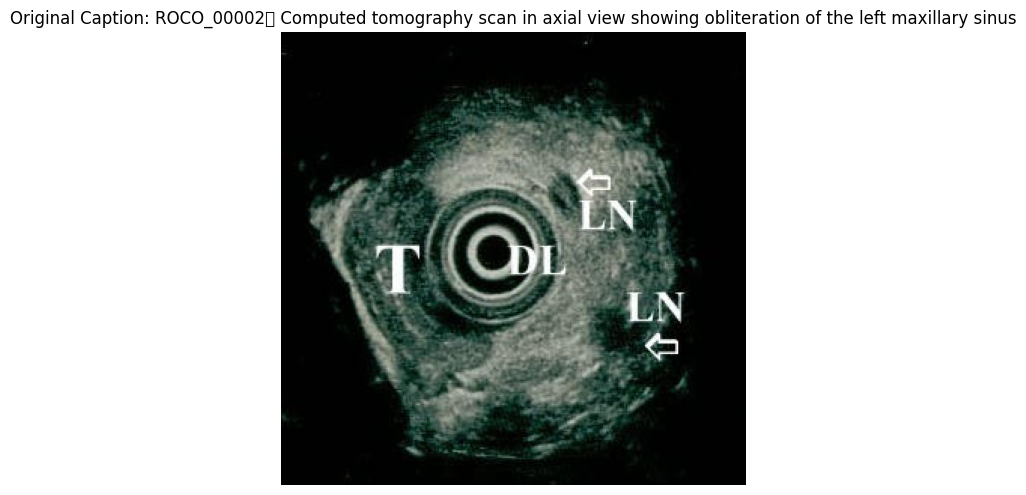

Image Path: C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images\PMC101389_1471-2482-2-1-4.jpg
Original Caption: ROCO_00002	 Computed tomography scan in axial view showing obliteration of the left maxillary sinus


In [126]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the paths for the image directory and captions file
image_dir =  'C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images'  # Path to the image directory
captions_file ='C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/captions.txt' # Path to the captions file


# Get a list of image file paths in the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]
# Read the captions from the captions file
with open(captions_file, 'r', encoding='utf-8') as f:
    captions = [line.strip() for line in f]


# Ensure both lists have the same length before zipping
min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]

# Select the first image and its caption
selected_image_path = image_paths[0]  # Select the first image
original_caption = captions[0]  # Select the corresponding caption

# Display the first image and its caption
img = mpimg.imread(selected_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title(f"Original Caption: {original_caption}", fontsize=12)  # Set the title as the caption
plt.show()

print(f"Image Path: {selected_image_path}")
print(f"Original Caption: {original_caption}")

# Tokenize the captions to prepare for training
corpus = captions  # Use all captions for training
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

# Create sequences
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

In [127]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer  # Import rouge_scorer

# Calculate BLEU Score
bleu_score = sentence_bleu([original_caption.split()], generated_caption.split())
print(f"\nBLEU Score: {bleu_score}")

# Calculate ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_score = scorer.score(generated_caption, original_caption)
print(f"ROUGE Score: {rouge_score}")


BLEU Score: 0.4306730037763717
ROUGE Score: {'rouge1': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8), 'rougeL': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8)}
